<a href="https://colab.research.google.com/github/b-richins92/Cancer_Prediction/blob/main/Model_Evaluation_Using_RFE_and_PyCaret_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from imblearn.over_sampling import SMOTE
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
from sklearn.naive_bayes import GaussianNB

Read three CSV files: train_df.csv, test_df.csv, and val_df.csv. Each file is loaded into a separate DataFrame (train_df, test_df, and val_df), which will be used for training, testing, and validation purposes in a machine learning pipeline.

In [3]:
# Read the training dataset from 'train_df.csv' into a DataFrame
train_df = pd.read_csv('train_df.csv')

# Read the test dataset from 'test_df.csv' into a DataFrame
test_df = pd.read_csv('test_df.csv')

# Read the validation dataset from 'val_df.csv' into a DataFrame
val_df = pd.read_csv('val_df.csv')

This code defines a list of important columns for Recursive Feature Elimination (RFE) and selects these columns from the training, testing, and validation DataFrames. It then splits each DataFrame into features (X) and target (y), where the target is the 'Cancer' column.

In [4]:
# Define the important columns for RFE
RFE_important_column = [
    'Age Group', 'Num of Bad Mental Health Days', 'Hours of Sleeping',
    'Age Started Smoking', 'Cigarettes per Day', 'Days Drinking',
    'Tetanus Last 10 Years', 'Metropolitan', 'BMI','Education_attended_college', 'Cancer'
    ]
# Select the important columns for RFE from the training, testing, and validation DataFrames
train_RFE_df = train_df[RFE_important_column]
test_RFE_df =  test_df[RFE_important_column]
val_RFE_df = val_df[RFE_important_column]

In [5]:
# Drop NA if there is any
train_RFE_df = train_RFE_df.dropna()
test_RFE_df = test_RFE_df.dropna()
val_RFE_df = val_RFE_df.dropna()

In [6]:
# Split the training DataFrame into features (X) and target (y)
X_train_RFE = train_RFE_df.drop('Cancer', axis=1)
y_train_RFE = train_RFE_df['Cancer']

In [9]:
# Split the testing DataFrame into features (X) and target (y)
X_test_RFE = test_RFE_df.drop('Cancer', axis=1)
y_test_RFE = test_RFE_df['Cancer']

In [10]:
# Split the validation DataFrame into features (X) and target (y)
X_val_RFE = val_RFE_df.drop('Cancer', axis=1)
y_val_RFE = val_RFE_df['Cancer']

In [11]:
# Define the important columns for pycaret
pycaret_important_column = ['Age Group', 'Pneumonia Vaccine', 'Arthritis', 'Flu Vaccine', 'Ethnicity_White', 'BMI', 'Had COVID', 'Married', 'Gender', 'Tetanus Last 10 Years', 'Cancer']
train_pycaret_df = train_df[pycaret_important_column]
test_pycaret_df =  test_df[pycaret_important_column]
val_pycaret_df = val_df[pycaret_important_column]

In [12]:
# Drop NA if there is any
train_pycaret_df = train_pycaret_df.dropna()
test_pycaret_df = test_pycaret_df.dropna()
val_pycaret_df = val_pycaret_df.dropna()

In [13]:
# Split the training DataFrame into features (X) and target (y)
X_train_pycaret = train_pycaret_df.drop('Cancer', axis=1)
y_train_pycaret = train_pycaret_df['Cancer']

In [14]:
# Split the testing DataFrame into features (X) and target (y)
X_test_pycaret = test_pycaret_df.drop('Cancer', axis=1)
y_test_pycaret = test_pycaret_df['Cancer']

In [15]:
# Split the validation DataFrame into features (X) and target (y)
X_val_pycaret = val_pycaret_df.drop('Cancer', axis=1)
y_val_pycaret = val_pycaret_df['Cancer']

In [16]:
y = y_train_RFE[y_train_RFE == 0]
len(y)

117111

In [17]:

# Define the different SMOTE ratios to test
ratios = [0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50]

# List to store recall scores
recall_scores = []

# Lists to store recall scores
train_recall_scores = []
test_recall_scores = []

# Initial recall without SMOTE
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_RFE, y_train_RFE)
y_train_pred = clf.predict(X_train_RFE)
y_test_pred = clf.predict(X_test_RFE)
train_recall = recall_score(y_train_RFE, y_train_pred)
test_recall = recall_score(y_test_RFE, y_test_pred)
train_recall_scores.append(train_recall)
test_recall_scores.append(test_recall)
print(f"Without SMOTE, Train Recall: {train_recall}, Test Recall: {test_recall}")

# Loop through each ratio
for ratio in ratios:
    # Apply SMOTE
    smote = SMOTE(sampling_strategy=ratio, random_state=42)
    X_res, y_res = smote.fit_resample(X_train_RFE, y_train_RFE)

    # Train a classifier
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_res, y_res)

    # Predict on the training set
    y_train_pred = clf.predict(X_res)
    train_recall = recall_score(y_res, y_train_pred)
    train_recall_scores.append(train_recall)

    # Predict on the test set
    y_test_pred = clf.predict(X_test_RFE)
    test_recall = recall_score(y_test_RFE, y_test_pred)
    test_recall_scores.append(test_recall)

    print(f"Ratio: {ratio}, Train Recall: {train_recall}, Test Recall: {test_recall}")





Without SMOTE, Train Recall: 0.9839300244100895, Test Recall: 0.03242490551024468
Ratio: 0.2, Train Recall: 0.9910767654342072, Test Recall: 0.5313308136065248
Ratio: 0.25, Train Recall: 0.9932370119889333, Test Recall: 0.7057887407996817
Ratio: 0.3, Train Recall: 0.9944781259784249, Test Recall: 0.7945096479013328
Ratio: 0.35, Train Recall: 0.9953157021567288, Test Recall: 0.8169882633777601
Ratio: 0.4, Train Recall: 0.9962215011527623, Test Recall: 0.8679132683509051
Ratio: 0.45, Train Recall: 0.9967741323364769, Test Recall: 0.8868112194151582
Ratio: 0.5, Train Recall: 0.9970113568439928, Test Recall: 0.8947682514422121


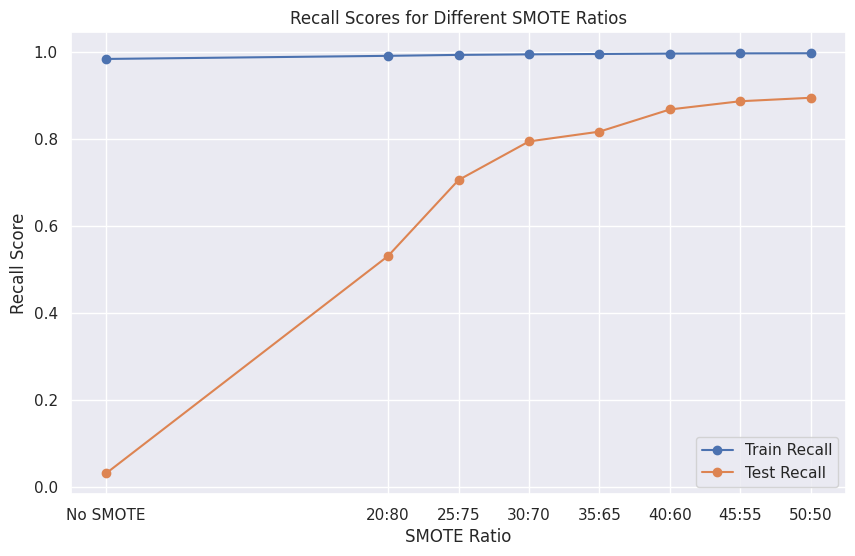

In [18]:
# Plot the recall scores
plt.figure(figsize=(10, 6))
plt.plot([0] + ratios, train_recall_scores, marker='o', label='Train Recall')
plt.plot([0] + ratios, test_recall_scores, marker='o', label='Test Recall')
plt.title('Recall Scores for Different SMOTE Ratios')
plt.xlabel('SMOTE Ratio')
plt.ylabel('Recall Score')
plt.xticks([0] + ratios, ['No SMOTE'] + [f'{int(r*100)}:{100-int(r*100)}' for r in ratios])
plt.legend()
plt.grid(True)
plt.show()

In [21]:
# Lists to store recall scores
train_recall_scores = []
test_recall_scores = []

# Initial recall without SMOTE
clf = GaussianNB()
clf.fit(X_train_RFE, y_train_RFE)
y_train_pred = clf.predict(X_train_RFE)
y_test_pred = clf.predict(X_test_RFE)
train_recall = recall_score(y_train_RFE, y_train_pred)
test_recall = recall_score(y_test_RFE, y_test_pred)
train_recall_scores.append(train_recall)
test_recall_scores.append(test_recall)
print(f"Without SMOTE, Train Recall: {train_recall}, Test Recall: {test_recall}")

# Loop through each ratio
for ratio in ratios:
    # Apply SMOTE
    smote = SMOTE(sampling_strategy=ratio, random_state=42)
    X_res, y_res = smote.fit_resample(X_train_RFE, y_train_RFE)

    # Train a classifier
    clf = GaussianNB()
    clf.fit(X_res, y_res)

    # Predict on the training set
    y_train_pred = clf.predict(X_res)
    train_recall = recall_score(y_res, y_train_pred)
    train_recall_scores.append(train_recall)

    # Predict on the test set
    y_test_pred = clf.predict(X_test_RFE)
    test_recall = recall_score(y_test_RFE, y_test_pred)
    test_recall_scores.append(test_recall)

    print(f"Ratio: {ratio}, Train Recall: {train_recall}, Test Recall: {test_recall}")



Without SMOTE, Train Recall: 0.07702739354488744, Test Recall: 0.0833499104833897
Ratio: 0.2, Train Recall: 0.12133891213389121, Test Recall: 0.12870499303759697
Ratio: 0.25, Train Recall: 0.17337841992007377, Test Recall: 0.18102247861547643
Ratio: 0.3, Train Recall: 0.22423362650499531, Test Recall: 0.23035607718321066
Ratio: 0.35, Train Recall: 0.2785937347516346, Test Recall: 0.2771036403421524
Ratio: 0.4, Train Recall: 0.32473742635129366, Test Recall: 0.32365227770041777
Ratio: 0.45, Train Recall: 0.3794948670752766, Test Recall: 0.3743783568728864
Ratio: 0.5, Train Recall: 0.4392622320894885, Test Recall: 0.42729261985279493


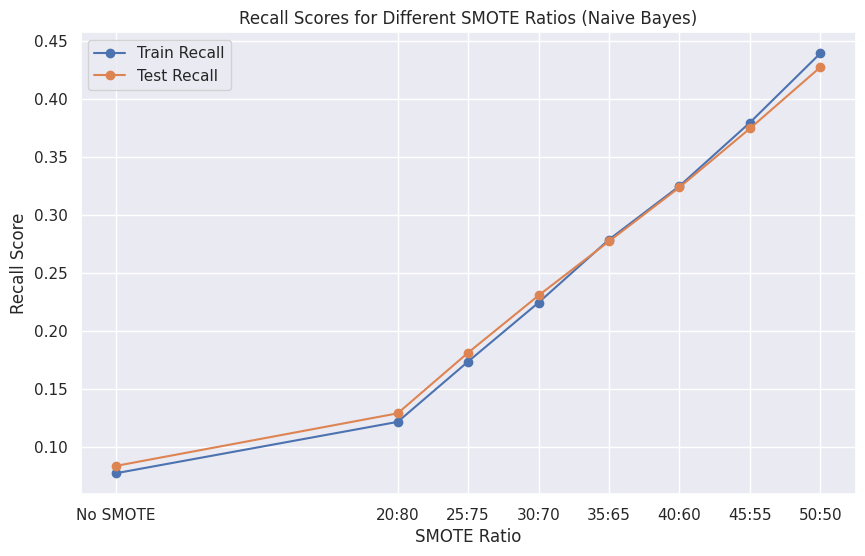

In [22]:
# Plot the recall scores
plt.figure(figsize=(10, 6))
plt.plot([0] + ratios, train_recall_scores, marker='o', label='Train Recall')
plt.plot([0] + ratios, test_recall_scores, marker='o', label='Test Recall')
plt.title('Recall Scores for Different SMOTE Ratios (Naive Bayes)')
plt.xlabel('SMOTE Ratio')
plt.ylabel('Recall Score')
plt.xticks([0] + ratios, ['No SMOTE'] + [f'{int(r*100)}:{100-int(r*100)}' for r in ratios])
plt.legend()
plt.grid(True)
plt.show()

In [23]:
# Initialize SMOTE with a random state for reproducibility
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data to handle class imbalance
# This generates synthetic samples for the minority class
X_train_RFE, y_train_RFE = smote.fit_resample(X_train_RFE, y_train_RFE)

In [26]:
# Initialize and fit a Gaussian Naive Bayes model using the RFE-selected training data
RFE_nb= GaussianNB() # Initialize the Gaussian Naive Bayes model
RFE_nb.fit(X_train_RFE, y_train_RFE) # Fit the model to the training data

# Initialize and fit a Random Forest classifier using the RFE-selected training data
RFE_clf = RandomForestClassifier(random_state=42)# Initialize the Random Forest model with a random state for reproducibility
RFE_clf.fit(X_train_RFE, y_train_RFE) # Fit the model to the training data

RandomForestClassifier(random_state=42)

In [27]:
# Predict the target values for the training and testing datasets using the fitted Gaussian Naive Bayes model
nb_RFE_y_train_pred = RFE_nb.predict(X_train_RFE)
nb_RFE_y_test_pred = RFE_nb.predict(X_test_RFE)

# Calculate the recall score for the training and testing datasets
nb_train_recall = recall_score(y_train_RFE, nb_RFE_y_train_pred)
nb_test_recall = recall_score(y_test_RFE, nb_RFE_y_test_pred)

In [28]:
# Predict the target values for the training and testing datasets using the fitted Random Forest model
rf_RFE_y_train_pred = RFE_clf.predict(X_train_RFE)
rf_RFE_y_test_pred = RFE_clf.predict(X_test_RFE)

# Calculate the recall score for the training and testing datasets
rf_train_recall = recall_score(y_train_RFE, rf_RFE_y_train_pred)
rf_test_recall = recall_score(y_test_RFE, rf_RFE_y_test_pred)

In [36]:
# Print the recall scores for the Naive Bayes model
print(f"Naive Bayes Train Recall: {nb_train_recall}")
print(f"Naive Bayes Test Recall: {nb_test_recall}")

# Print the recall scores for the Random Forest model
print(f"\nRandom Forest Train Recall: {rf_train_recall}")
print(f"Random Forest Test Recall: {rf_test_recall}")

Naive Bayes Train Recall: 0.7883631768151582
Naive Bayes Test Recall: 0.7710364034215238

Random Forest Train Recall: 0.9987447805927709
Random Forest Test Recall: 0.9476825144221206


In [30]:
# Initialize SMOTE with a random state for reproducibility
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data to handle class imbalance
# This generates synthetic samples for the minority class
X_train_pycaret, y_train_pycaret = smote.fit_resample(X_train_pycaret, y_train_pycaret)

In [31]:
# Initialize and fit a Gaussian Naive Bayes model using the PyCaret-selected training data
pycaret_nb= GaussianNB() # Initialize the Gaussian Naive Bayes model
pycaret_nb.fit(X_train_pycaret, y_train_pycaret) # Fit the model to the PyCaret training data

# Initialize and fit a Random Forest classifier using the PyCaret-selected training data
pycaret_clf = RandomForestClassifier(random_state=42) # Initialize the Random Forest model
pycaret_clf.fit(X_train_pycaret, y_train_pycaret) # Fit the model to the PyCaret training data

RandomForestClassifier(random_state=42)

In [32]:
# Predict the target values for the training and testing datasets using the fitted PyCaret Naive Bayes model
pycaret_y_train_pred = pycaret_nb.predict(X_train_pycaret)
pycaret_y_test_pred = pycaret_nb.predict(X_test_pycaret)

# Calculate the recall score for the training and testing datasets
pycaret_train_recall = recall_score(y_train_pycaret, pycaret_y_train_pred)
pycaret_test_recall = recall_score(y_test_pycaret, pycaret_y_test_pred)

In [33]:
# Predict the target values for the training and testing datasets using the fitted PyCaret Random Forest model
rf_pycaret_y_train_pred = pycaret_clf.predict(X_train_pycaret)
rf_pycaret_y_test_pred = pycaret_clf.predict(X_test_pycaret)

# Calculate the recall score for the training and testing datasets
pycaret_rf_train_recall = recall_score(y_train_pycaret, rf_pycaret_y_train_pred)
pycaret_rf_test_recall = recall_score(y_test_pycaret, rf_pycaret_y_test_pred)

In [37]:
# Print the recall scores for the PyCaret model
print(f"PyCaret Train Recall: {pycaret_train_recall}")
print(f"PyCaret Test Recall: {pycaret_test_recall}")

# Print the recall scores for the PyCaret Random Forest model
print(f"\nPyCaret Random Forest Train Recall: {pycaret_rf_train_recall}")
print(f"PyCaret Random Forest Test Recall: {pycaret_rf_test_recall}")


PyCaret Train Recall: 0.7419883700079412
PyCaret Test Recall: 0.7215038790531132

PyCaret Random Forest Train Recall: 0.9917428764163913
PyCaret Random Forest Test Recall: 0.7443803461308932
